# Imports

In [1]:
# %pip install matplotlib seaborn transformers

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from numbers import Number
from typing import Optional, Any
from numpy.typing import ArrayLike

from functools import reduce

In [3]:
def _df_colors(val: Any):
    '''Функция для более выделяющихся цветов в датафреймах'''
    
    if isinstance(val, bool) and val is False:
        color = "red"
    elif isinstance(val, bool) and val is True:
        color = "limegreen"
    elif isinstance(val, Number):
        # color = "gold"
        color = "mediumspringgreen"
    else:
        color = "cornflowerblue"
    return "color: %s" % color

In [4]:
emo2num = {'С': 1,
           'О': 2,
           'Н': 3,
           'Ж': 4,
           'У': 5,
           'Р': 6,
           'Г': 7,
           'Б': 8,
           'З': 9,
           'В': 10}

num2emo = {val: key for key, val in emo2num.items()}

letter2emo = {
"Г": "грусть",
"З": "злость",
"Р": "радость",
"У": "удивление",
"В": "волнение",
"Ж": "раздражение",
"Н": "недовольство",
"О": "обида",
"Б": "обречённость",
"С": "страх"
}

In [5]:
# %pip install catboost scikit-learn huggingface_hub

In [6]:
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay#, multilabel_confusion_matrix
from sklearn.inspection import permutation_importance

In [8]:
std_scaler = StandardScaler()

In [9]:
def print_metrics(y_preds: ArrayLike, 
                  y: ArrayLike, 
                  y_probs: Optional[ArrayLike] = None
) -> None:
    print(f'MSE: {mean_squared_error(y_preds, y)}')
    print(f"Accuracy: {accuracy_score(y_preds, y)}")
    print(f"F-score: {f1_score(y, y_preds, average='weighted')}")
    if y_probs is not None: 
        print(f"ROC-AUC: {roc_auc_score(y, y_probs, multi_class='ovr')}")

In [10]:
def show_conf_matrx(y_real: ArrayLike, y_preds: ArrayLike, classes: ArrayLike, title: str="") -> None:
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.set_title(title)
    cm_rfc = confusion_matrix(y_real, y_preds)
    disp_rfc = ConfusionMatrixDisplay(cm_rfc, 
                                      display_labels=[letter2emo[num2emo[klas]] for klas in classes])
    disp_rfc.plot(include_values=True, cmap="viridis", ax=ax, colorbar=True)

In [11]:
def show_roc_curves(y_train: ArrayLike, y_test: ArrayLike, y_score: ArrayLike, classes: ArrayLike) -> None:
    label_binarizer = LabelBinarizer().fit(y_train)
    y_onehot_test = label_binarizer.transform(y_test)

    fig, axs = plt.subplots(ncols=5,
                            nrows=2, 
                            figsize=(25, 10))
    for class_of_interest, axis in zip(classes, axs.flatten()):
        class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
        display = RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"{letter2emo[num2emo[class_of_interest]]} vs the rest",
            color="darkorange",
            plot_chance_level=True,
            ax=axis
        )
        _ = display.ax_.set(
            xlabel="",
            ylabel="",
            # title="One-vs-Rest ROC curves",
        )

In [12]:
def show_feature_importances(importances: ArrayLike, feature_names: ArrayLike, title: str, size=(6,6)) -> None:
    importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    sorted_importance = importances_df.sort_values(by='Importance', ascending=False)
    sorted_importance = sorted_importance[sorted_importance != 0]
    # fig, ax = plt.subplots(figsize=(10,6))
    plt.figure(figsize=size)
    plt.barh(sorted_importance['Feature'], sorted_importance['Importance'])
    plt.title(title)

In [13]:
# %pip install torch

# RUbert-base-cased-sentence

In [14]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline(task="feature-extraction", model="DeepPavlov/rubert-base-cased-sentence")

C:\Users\Ivan\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
pipe?

Signature:      pipe(*args, **kwargs)
Type:           FeatureExtractionPipeline
String form:    <transformers.pipelines.feature_extraction.FeatureExtractionPipeline object at 0x00000258988E8B50>
File:           c:\users\ivan\appdata\roaming\python\python311\site-packages\transformers\pipelines\feature_extraction.py
Docstring:     
Feature extraction pipeline using no model head. This pipeline extracts the hidden states from the base
transformer, which can be used as features in downstream tasks.

Example:

```python
>>> from transformers import pipeline

>>> extractor = pipeline(model="bert-base-uncased", task="feature-extraction")
>>> result = extractor("This is a simple test.", return_tensors=True)
>>> result.shape  # This is a tensor of shape [1, sequence_lenth, hidden_dimension] representing the input string.
torch.Size([1, 8, 768])
```

Learn more about the basics of using a pipeline in the [pipeline tutorial](../pipeline_tutorial)

This feature extraction pipeline can currently b

In [16]:
purga = pipe("всякую пургу несет ломится в дом", return_tensors="pt")[0].numpy().mean(axis=0)
print(type(purga))
purga.shape

<class 'numpy.ndarray'>


(768,)

# Dataset

In [17]:
df = pd.read_csv(r"C:\Users\Ivan\Desktop\AI\0_Dissertation\work_in_progress\basic_metrics_DF.csv", sep=",", index_col=0)
df = df[df.columns[:3]]

In [18]:
df

,IDs,Primary Emotion,Emotion Class
0,0107635181_00__00-channel-0-number-004_18310,С,1
1,0107635181_00__00-channel-0-number-005_22100,С,1
2,0107635181_00__00-channel-0-number-006_26690,С,1
3,0107636961_00__00-channel-0-number-009_34800,С,1
4,0107638181_00__00-channel-0-number-018_59400,С,1
...,...,...,...
3557,0107694921_00__00-channel-0-number-022_81650,В,10
3558,0107694921_00__00-channel-0-number-023_84640,В,10
3559,0107695241_00__00-channel-0-number-008_23670,В,10
3560,0107695481_00__00-channel-0-number-015_46040,В,10


In [19]:
with open(r"C:\Users\Ivan\Desktop\AI\0_Dissertation\texts.txt", "r", encoding="utf-8") as f:
    texts = [line.strip() for line in f.readlines()]

In [20]:
len(texts)

3572

In [21]:
len(df["IDs"])

3562

In [22]:
text_embeds = pipe(texts, return_tensors="pt")

In [23]:
text_embeds = [emb[0].numpy().mean(axis=0) for emb in text_embeds]

In [24]:
print(type(text_embeds))
print(len(text_embeds))
print(text_embeds[0].shape)

<class 'list'>
3572
(768,)


In [25]:
text_embeds.insert(0, [f"feat{i}" for i in range(768)])

In [26]:
text_embeds_df = pd.DataFrame(text_embeds[1:], columns=text_embeds[0])
text_embeds_df

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat758,feat759,feat760,feat761,feat762,feat763,feat764,feat765,feat766,feat767
0,-0.336182,-0.978600,0.064792,0.014678,-0.489019,-1.092950,0.564810,-0.586239,0.680381,0.206242,...,-0.226758,0.625000,0.425370,-0.389919,-0.288666,0.664744,0.569422,-0.443074,-1.937111,0.295056
1,-0.615437,-1.193338,0.181830,0.332161,-1.090739,-0.921048,0.461458,-0.645809,0.313686,0.330984,...,0.296886,0.773741,-0.107751,-0.025881,0.470922,0.290819,-0.073809,0.106050,-0.419256,0.983564
2,-0.549098,-0.902955,0.268358,-0.542761,-0.687137,-0.715993,0.428710,0.179674,0.141197,-0.427279,...,-0.094857,0.934849,0.453269,-0.040649,-0.102064,0.519733,-0.162834,0.556302,-0.898968,1.578456
3,-0.397106,-0.905730,0.059483,-0.190682,-0.921463,-1.212287,1.200264,-0.975857,0.639443,-0.471629,...,0.664801,0.796822,-0.120022,-0.789867,0.464255,0.445329,-0.349348,-0.415858,-1.530666,0.169328
4,-0.470222,-0.621110,0.139886,-0.192296,-1.096364,-0.867446,1.195484,-0.873055,0.079131,-1.213681,...,0.408307,0.669286,0.491029,-0.699428,-0.341290,0.492714,-0.440385,-0.742059,-0.982369,1.175749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567,-0.587985,-1.230122,0.012684,-0.541513,-1.019719,-0.959615,0.998319,-0.990591,0.188853,-0.477304,...,1.115508,0.822818,0.272012,-0.076764,-0.494952,0.580714,-0.211996,-0.580840,-1.035424,0.125644
3568,-0.388379,-1.336124,-0.097332,-0.725856,-0.879984,-0.204315,0.672689,-1.059146,0.003166,-0.627051,...,0.713367,0.753234,-0.116164,0.106710,-0.459737,0.242026,-0.374719,-0.096708,-0.598987,1.642665
3569,-0.275345,-1.376961,0.654090,-1.514799,-0.630188,-0.979290,0.505319,1.257117,-0.071340,-0.044508,...,-0.720569,0.839719,-0.581412,-0.073526,0.672445,-0.143098,0.401223,0.475732,-0.383431,0.987154
3570,-0.606162,-1.226191,-0.472120,-0.075324,-1.178377,-0.782325,0.681780,-0.522094,0.970932,-0.628848,...,0.485742,0.640106,0.282853,-0.161575,-0.002824,0.849256,-0.244747,-0.207271,-1.096731,0.073357


In [27]:
newDF = pd.merge(df, text_embeds_df, left_index=True, right_index=True)
newDF

,IDs,Primary Emotion,Emotion Class,feat0,feat1,feat2,feat3,feat4,feat5,feat6,...,feat758,feat759,feat760,feat761,feat762,feat763,feat764,feat765,feat766,feat767
0,0107635181_00__00-channel-0-number-004_18310,С,1,-0.336182,-0.978600,0.064792,0.014678,-0.489019,-1.092950,0.564810,...,-0.226758,0.625000,0.425370,-0.389919,-0.288666,0.664744,0.569422,-0.443074,-1.937111,0.295056
1,0107635181_00__00-channel-0-number-005_22100,С,1,-0.615437,-1.193338,0.181830,0.332161,-1.090739,-0.921048,0.461458,...,0.296886,0.773741,-0.107751,-0.025881,0.470922,0.290819,-0.073809,0.106050,-0.419256,0.983564
2,0107635181_00__00-channel-0-number-006_26690,С,1,-0.549098,-0.902955,0.268358,-0.542761,-0.687137,-0.715993,0.428710,...,-0.094857,0.934849,0.453269,-0.040649,-0.102064,0.519733,-0.162834,0.556302,-0.898968,1.578456
3,0107636961_00__00-channel-0-number-009_34800,С,1,-0.397106,-0.905730,0.059483,-0.190682,-0.921463,-1.212287,1.200264,...,0.664801,0.796822,-0.120022,-0.789867,0.464255,0.445329,-0.349348,-0.415858,-1.530666,0.169328
4,0107638181_00__00-channel-0-number-018_59400,С,1,-0.470222,-0.621110,0.139886,-0.192296,-1.096364,-0.867446,1.195484,...,0.408307,0.669286,0.491029,-0.699428,-0.341290,0.492714,-0.440385,-0.742059,-0.982369,1.175749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,0107694921_00__00-channel-0-number-022_81650,В,10,-0.955566,-2.040787,0.405916,-0.639763,-1.234323,-0.435526,0.921110,...,0.535240,0.801000,0.646183,-0.520171,-0.633132,0.147722,-0.039922,-0.099306,-0.873322,0.151836
3558,0107694921_00__00-channel-0-number-023_84640,В,10,-0.207862,-1.128287,-0.351669,-0.553048,-1.149333,-0.798753,0.575641,...,0.770231,0.828815,-0.007207,0.043452,-0.269909,0.102833,-0.226013,-0.158706,-0.430645,1.395814
3559,0107695241_00__00-channel-0-number-008_23670,В,10,-0.716838,-1.579985,0.418477,-0.676163,-1.195470,-0.595522,0.277405,...,0.548266,0.839283,-0.517062,0.170262,0.034637,0.168225,-0.625856,0.235345,-0.722968,0.709950
3560,0107695481_00__00-channel-0-number-015_46040,В,10,-0.509710,-0.117908,0.306339,0.519209,-0.709612,-0.391836,0.114984,...,0.111601,0.326648,0.713396,-0.904035,0.597415,-0.097794,0.339085,0.120307,-0.203103,0.821128


In [28]:
newDF = newDF.drop_duplicates(subset=["IDs"])
newDF.shape

(3488, 771)

In [ ]:
classes_merge_table = {1: 10,
                       2: 7,
                       3: 3,
                       4: 3,
                       5: 5,
                       6: 5,
                       7: 7,
                       8: 7,
                       9: 3,
                       10: 10}

In [ ]:
# print(newDF.shape)
# newDF.drop(newDF[newDF["Primary Emotion"] == "Р"].index, inplace=True)
# print(newDF.shape)

In [ ]:
newDF = newDF.replace({"Emotion Class": classes_merge_table})
set(newDF["Emotion Class"])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(newDF[newDF.columns[3:]], 
                                                    newDF["Emotion Class"], 
                                                    test_size=0.1, # данных не так много, берём максимум на обучение 
                                                    shuffle=True, 
                                                    random_state=42)

In [31]:
newDF.to_csv("embeddings_DF.csv")

# Decision tree

In [30]:
dtc = DecisionTreeClassifier(criterion="gini", 
                             splitter="best", 
                             max_depth = 7, 
                            #  min_samples_split = 2, 
                            #  min_samples_leaf = 1, 
                            #  min_weight_fraction_leaf = 0, 
                            #  max_features = "sqrt", 
                             random_state = 42, 
                            #  max_leaf_nodes = None, 
                            #  min_impurity_decrease = 0, 
                            #  class_weight = None, 
                             ccp_alpha = 0)
dtc.fit(X=X_train, y=y_train)

print("Test:")
print_metrics(dtc.predict(X_test), y_test, dtc.predict_proba(X_test))

print("\nTrain:")
print_metrics(dtc.predict(X_train), y_train, dtc.predict_proba(X_train))

Test:
MSE: 19.621776504297994
Accuracy: 0.4355300859598854
F-score: 0.38450301124907144


ValueError: Number of classes in y_true not equal to the number of columns in 'y_score'

# Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators=1000,
                             criterion="gini",
                             max_depth=10, 
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0,
                             max_features="sqrt",
                             max_leaf_nodes=None,
                             min_impurity_decrease=0,
                             bootstrap=True,
                             oob_score=False,
                             n_jobs=-1,
                             random_state=42,
                             verbose=0,
                             warm_start=False,
                             class_weight=None,
                             ccp_alpha=0,
                             max_samples=None
)
rfc.fit(X=X_train, y=y_train)

print("Test:")
print_metrics(rfc.predict(X_test), y_test, rfc.predict_proba(X_test))
print("\nTrain:")
print_metrics(rfc.predict(X_train), y_train, rfc.predict_proba(X_train))

Test:
MSE: 20.437142857142856
Accuracy: 0.44285714285714284
F-score: 0.30133075266368753
ROC-AUC: 0.6724575129117313

Train:
MSE: 5.082909783989835
Accuracy: 0.8116264294790343
F-score: 0.7800748043361274
ROC-AUC: 0.9997953950775598


# CatBoost

In [ ]:
cbc = CatBoostClassifier()

cbc.fit(X_train, y_train)
preds_class = cbc.predict(X_test)
print_metrics(preds_class, y_test, cbc.predict_proba(X_test))

Learning rate set to 0.083892
0:	learn: 2.1624286	total: 1.71s	remaining: 28m 32s
1:	learn: 2.0530065	total: 3.07s	remaining: 25m 31s
2:	learn: 1.9609373	total: 4.27s	remaining: 23m 40s
3:	learn: 1.8887894	total: 5.52s	remaining: 22m 55s
4:	learn: 1.8264092	total: 6.72s	remaining: 22m 17s
5:	learn: 1.7735616	total: 8s	remaining: 22m 5s
6:	learn: 1.7306389	total: 9.25s	remaining: 21m 52s
7:	learn: 1.6943722	total: 10.5s	remaining: 21m 44s
8:	learn: 1.6616364	total: 12s	remaining: 22m 3s
9:	learn: 1.6346825	total: 13.5s	remaining: 22m 19s
10:	learn: 1.6099490	total: 15s	remaining: 22m 32s
11:	learn: 1.5864081	total: 16.6s	remaining: 22m 50s
12:	learn: 1.5662091	total: 18.2s	remaining: 23m 2s
13:	learn: 1.5480153	total: 19.7s	remaining: 23m 7s
14:	learn: 1.5300618	total: 21.2s	remaining: 23m 11s
15:	learn: 1.5143672	total: 22.7s	remaining: 23m 13s
16:	learn: 1.4990474	total: 24.1s	remaining: 23m 15s
17:	learn: 1.4870485	total: 25.6s	remaining: 23m 15s
18:	learn: 1.4736387	total: 27s	remai

# Linear Support Vectors

In [ ]:
linSVM = SVC(
             C=0.1, 
             kernel="linear", 
             degree=3, 
             gamma="scale", 
             coef0=0, 
             shrinking=True, 
             probability=True, 
             tol=0.001, 
             cache_size=200, 
             class_weight=None, 
             verbose=False, 
             # max_iter: Int = ..., 
             decision_function_shape="ovr", 
             break_ties=False, 
             random_state=42
)

linSVM.fit(X=X_train, y=y_train)

print("Test:")
print_metrics(linSVM.predict(X_test), y_test, linSVM.predict_proba(X_test))
print("\nTrain:")
print_metrics(linSVM.predict(X_train), y_train, linSVM.predict_proba(X_train))

Test:
MSE: 18.44857142857143
Accuracy: 0.47714285714285715
F-score: 0.43337334538668676
ROC-AUC: 0.7064471626202647

Train:
MSE: 9.060991105463787
Accuracy: 0.7179161372299873
F-score: 0.6944621806993498
ROC-AUC: 0.9271285214180605


In [ ]:
parameters = {
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid']
}

In [ ]:
svm = SVC(random_state=42)

In [ ]:
svm_grid = GridSearchCV(estimator=svm, 
                        param_grid=parameters, 
                        scoring=None, 
                        refit=True, 
                        verbose=4, 
                        pre_dispatch="2*n_jobs", 
                        return_train_score=False, 
                        cv=5, 
                        n_jobs=-1)
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=4)

In [ ]:
svm_grid.best_params_

{'kernel': 'poly'}

# MFCC

In [32]:
import librosa

In [33]:
y, sr = librosa.load(r"C:\Users\Ivan\Desktop\AI\0_Dissertation\emo_audio\0107578611_00__00-channel-0-number-001_3070.wav")

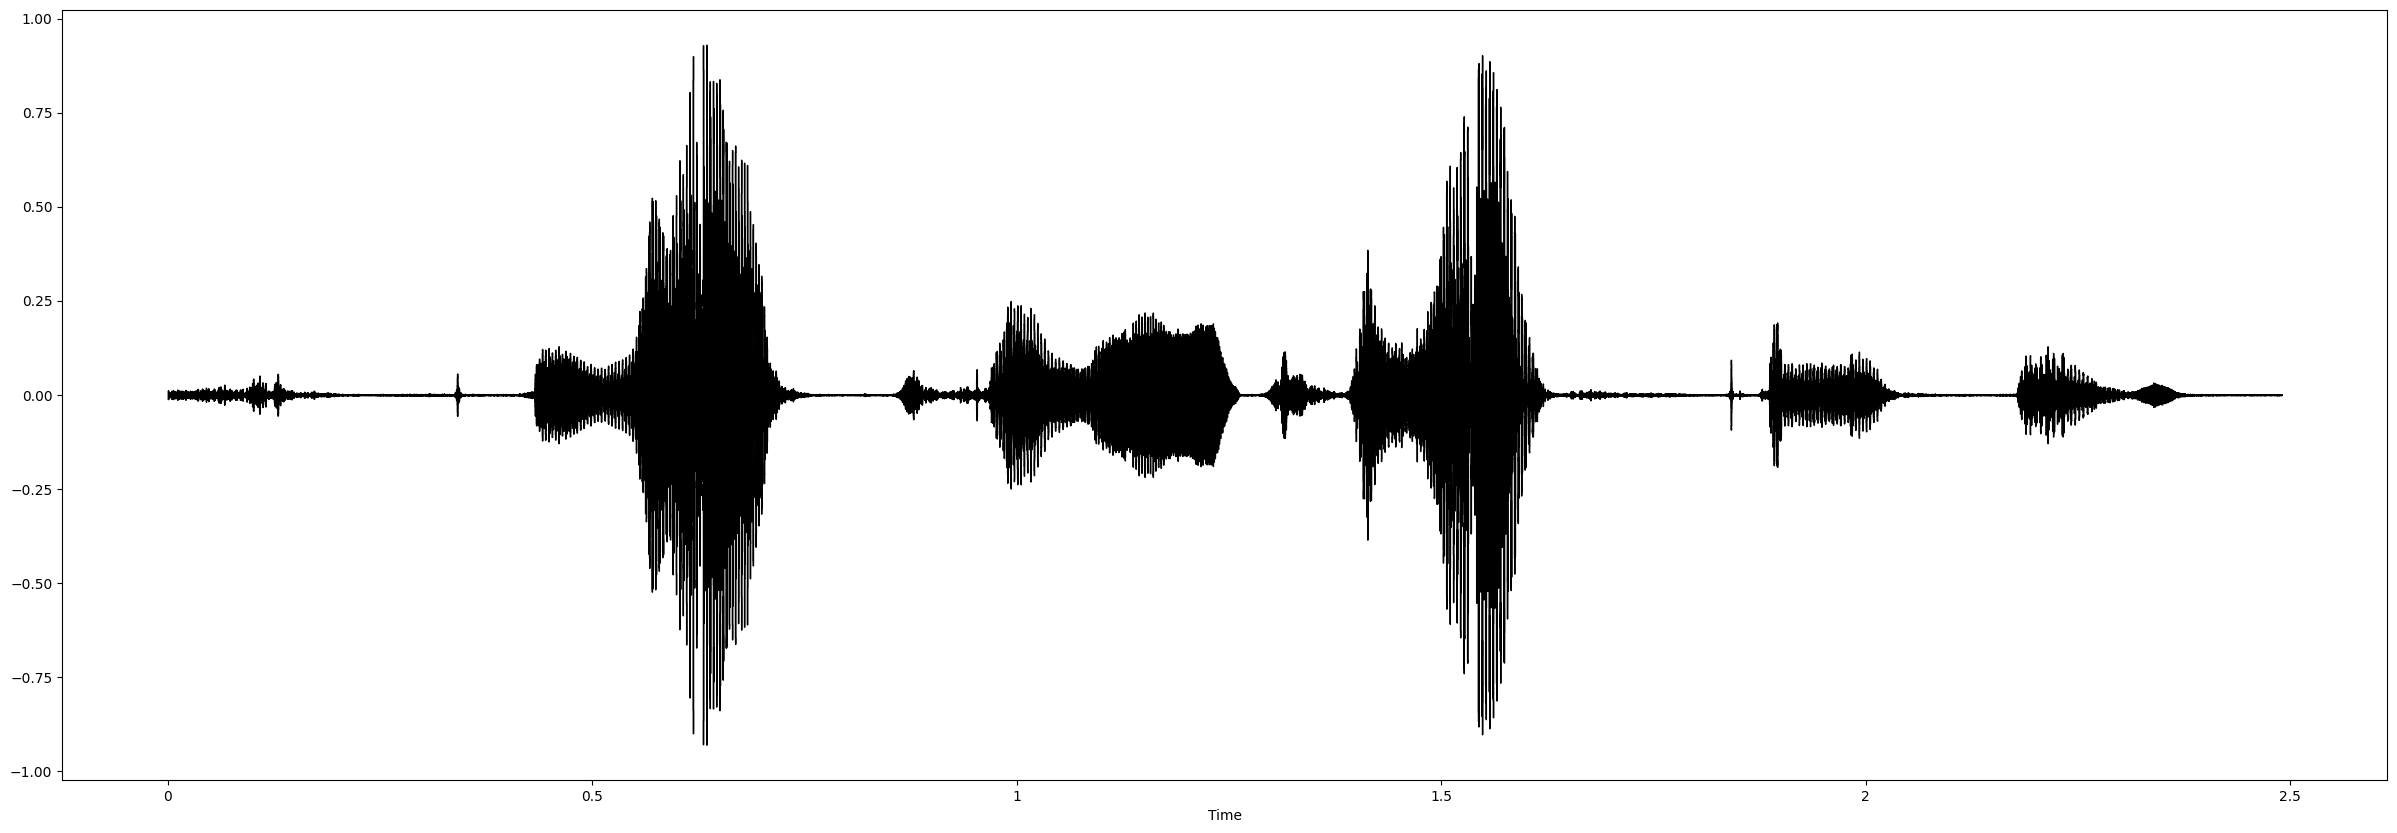

In [34]:
plt.figure(figsize=(30,10))
librosa.display.waveshow(y, sr=sr, color="black");

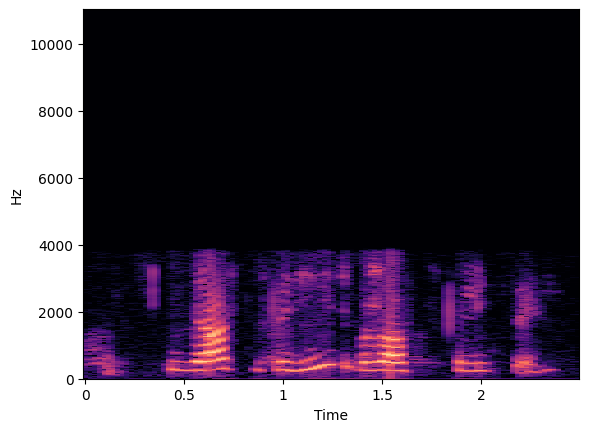

In [35]:
# plt.figure(figsize=(30,10))
D = np.abs(librosa.stft(y))
db = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(db, sr=sr, y_axis='hz', x_axis='time');

In [36]:
frame_width = 20 # ms
frame_step = 10 # ms

print(frame_width := round(frame_width * 0.001 * sr)) # ms to the number of samples
print(frame_step := round(frame_step * 0.001 * sr)) # ms to the number of samples

print(nfft := int(2**np.ceil(np.log2(frame_width)))) # closest upper power of 2 for frame width

441
220
512


In [37]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, n_fft=nfft, hop_length=frame_step, win_length=frame_width)

In [39]:
MFCCs = {"IDs": list(newDF["IDs"])}
for i in range(13):
    MFCCs[f"MFCC{i+1}"] = []

In [40]:
for i, filename in enumerate(newDF["IDs"]):
# get the time series
    y, sr = librosa.load(rf"C:\Users\Ivan\Desktop\AI\0_Dissertation\emo_audio2\{filename}.wav")
# get the coefficients
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, n_fft=nfft, hop_length=frame_step, win_length=frame_width)
# scale the coefficients
    mfccScaled = np.mean(mfcc.T, axis=0)

    for j in range(len(mfccScaled)):
        MFCCs[f"MFCC{j+1}"].append(mfccScaled[j])

In [41]:
mfccDF = pd.DataFrame(MFCCs)
mfccDF.head().style.map(_df_colors)

,IDs,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,MFCC13
0,0107635181_00__00-channel-0-number-004_18310,-430.050812,151.687164,-45.405285,6.089986,16.060833,-35.592243,-7.429289,-2.388579,-23.355518,-7.821520,-13.513171,-17.238529,2.689556
1,0107635181_00__00-channel-0-number-005_22100,-408.129059,156.219803,-50.914352,7.203946,17.909063,-39.309731,-9.709213,-2.864349,-24.096661,-5.696147,-9.311288,-14.882713,2.547493
2,0107635181_00__00-channel-0-number-006_26690,-420.051056,156.462692,-51.804707,14.146825,21.260660,-43.143650,-10.840601,-2.410405,-26.338383,-8.020977,-9.845235,-13.113922,4.449926
3,0107636961_00__00-channel-0-number-009_34800,-426.520721,146.728928,-62.518063,27.929390,32.911354,-50.893284,-17.124662,-3.472899,-27.367807,-4.063274,-8.074554,-16.785032,3.742684
4,0107638181_00__00-channel-0-number-018_59400,-411.087433,154.948792,-80.103027,19.974255,32.999275,-49.204975,-8.682093,-2.568156,-37.145340,-3.738223,0.261289,-17.637541,0.900998


In [42]:
merged = pd.merge(mfccDF, newDF)
merged.head().style.map(_df_colors)

In [43]:
merged.insert(1, "Primary Emotion", merged.pop("Primary Emotion"))
merged.insert(2, "Emotion Class", merged.pop("Emotion Class"))
merged.head().style.map(_df_colors)

In [44]:
classes_merge_table = {1: 10,
                       2: 7,
                       3: 3,
                       4: 3,
                       5: 5,
                       6: 5,
                       7: 7,
                       8: 7,
                       9: 3,
                       10: 10}

In [45]:
merged = merged.replace({"Emotion Class": classes_merge_table})
set(merged["Emotion Class"])

{3, 5, 7, 10}

In [46]:
X_train, X_test, y_train, y_test = train_test_split(merged[merged.columns[3:]], 
                                                    merged["Emotion Class"], 
                                                    test_size=0.1, # данных не так много, берём максимум на обучение 
                                                    shuffle=True, 
                                                    random_state=42)

In [47]:
cbc = CatBoostClassifier()

cbc.fit(X_train, y_train)
preds_class = cbc.predict(X_test)
print_metrics(preds_class, y_test, cbc.predict_proba(X_test))

Learning rate set to 0.08388
0:	learn: 1.3370808	total: 2.44s	remaining: 40m 33s
1:	learn: 1.2951904	total: 3.33s	remaining: 27m 43s
2:	learn: 1.2603253	total: 3.81s	remaining: 21m 6s
3:	learn: 1.2273357	total: 4.29s	remaining: 17m 47s
4:	learn: 1.1975803	total: 4.76s	remaining: 15m 47s
5:	learn: 1.1750804	total: 5.09s	remaining: 14m 2s
6:	learn: 1.1527328	total: 5.42s	remaining: 12m 49s
7:	learn: 1.1325424	total: 5.76s	remaining: 11m 54s
8:	learn: 1.1157476	total: 6.1s	remaining: 11m 11s
9:	learn: 1.1000545	total: 6.47s	remaining: 10m 40s
10:	learn: 1.0860740	total: 6.89s	remaining: 10m 20s
11:	learn: 1.0732592	total: 7.33s	remaining: 10m 3s
12:	learn: 1.0605634	total: 7.74s	remaining: 9m 47s
13:	learn: 1.0493452	total: 8.16s	remaining: 9m 34s
14:	learn: 1.0376020	total: 8.67s	remaining: 9m 29s
15:	learn: 1.0283556	total: 9.17s	remaining: 9m 24s
16:	learn: 1.0194817	total: 9.7s	remaining: 9m 20s
17:	learn: 1.0108077	total: 10.2s	remaining: 9m 17s
18:	learn: 1.0024304	total: 10.7s	rema